In [1]:
# Import libraries
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Read News and DJIA Data
df_news = pd.read_csv(os.path.join('..', 'data', 'RedditNews.csv'))
df_stock = pd.read_csv(os.path.join('..', 'data', 'upload_DJIA_table.csv'))

In [3]:
# check data
display(df_news.info())
display(df_stock.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    73608 non-null  object
 1   News    73608 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


None

In [4]:
# Adjust display settings

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Get 5 random samples with reproducibility
df_news.sample(n=5, random_state=42)


Date                                                                                                                                                                                                                                                                                                      News
37609  2012-05-18  Fishing Observers "Intimidated &amp; Bribed by EU Crews" -Observers monitoring European fish quotas are being regularly intimidated, offered bribes &amp; undermined by the fishing crews they are observing. Several observers recall being warned to back off because "accidents happen at sea".\r\n  
35970  2012-07-23                                                                                                                                                                                                                                                                             This is how racism takes root
61541  2009-10-04                                                                                                                                                 b'Irans nuclear threat is a lie. Obama\'s "showdown" with Iran has another agenda. The media have been tasked with preparing the public for endless war.'
652    2016-06-05                                                                                                                                                                                                                     Switzerland rejects proposals for unconditional basic income by overwhelming majority
37281  2012-05-31                                                                                                                                                                                                                                           Israeli politician: Send human rights activists to prison camps

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import re
import html

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the stop words
stop_words = set(stopwords.words('english'))

# Define a function to preprocess the headlines
def preprocess_text(text, mode="simple"):
    # Convert the text to lower case
    #text = text.lower()
    
    # Remove html entities
    text = html.unescape(text)
    
    # Remove byte-string prefix and content
    text = re.sub(r"b'", "", text)
    text = re.sub(r'b"', "", text)
    text = re.sub(r"\r", "", text)
    text = re.sub(r"\n", "", text)
    text = re.sub(r"\\", "", text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove numeric values
    text = re.sub(r'\d+', '', text)
    
    if mode == "advanced":   
    
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)

        # Tokenize the text
        text = text.split()

        # Remove stop words and lemmatize the words
        text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
        
        # Join the words back into a single string
        text = ' '.join(text)
        
    else:
        
        # Join the words back into a single string
        text = ''.join(text)
    
    return text

# Apply the function to the headlines
df_news['News_Preprocessed'] = df_news['News'].apply(preprocess_text)
df_news['News_Preprocessed_advanced'] = df_news['News'].apply(preprocess_text, mode="advanced")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\duzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\duzzi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
# Get 5 random samples with reproducibility
df_news.sample(n=5
               , random_state=42
              )

Date                                                                                                                                                                                                                                                                                                      News                                                                                                                                                                                                                                                                             News_Preprocessed                                                                                                                                                                                            News_Preprocessed_advanced
37609  2012-05-18  Fishing Observers "Intimidated &amp; Bribed by EU Crews" -Observers monitoring European fish quotas are being regularly intimidated, offered bribes &amp; undermined by the fishing crews they are observing. Several observers recall being warned to back off because "accidents happen at sea".\r\n    Fishing Observers "Intimidated & Bribed by EU Crews" -Observers monitoring European fish quotas are being regularly intimidated, offered bribes & undermined by the fishing crews they are observing. Several observers recall being warned to back off because "accidents happen at sea".    Fishing Observers Intimidated Bribed EU Crews Observers monitoring European fish quota regularly intimidated offered bribe undermined fishing crew observing Several observer recall warned back accident happen sea
35970  2012-07-23                                                                                                                                                                                                                                                                             This is how racism takes root                                                                                                                                                                                                                                                                 This is how racism takes root                                                                                                                                                                                                 This racism take root
61541  2009-10-04                                                                                                                                                 b'Irans nuclear threat is a lie. Obama\'s "showdown" with Iran has another agenda. The media have been tasked with preparing the public for endless war.'                                                                                                                                        Irans nuclear threat is a lie. Obama's "showdown" with Iran has another agenda. The media have been tasked with preparing the public for endless war.'                                                                                                           Irans nuclear threat lie Obamas showdown Iran another agenda The medium tasked preparing public endless war
652    2016-06-05                                                                                                                                                                                                                     Switzerland rejects proposals for unconditional basic income by overwhelming majority                                                                                                                                                                                                         Switzerland rejects proposals for unconditional basic income by overwhelming majority                                                                                                                                          Switzerlan

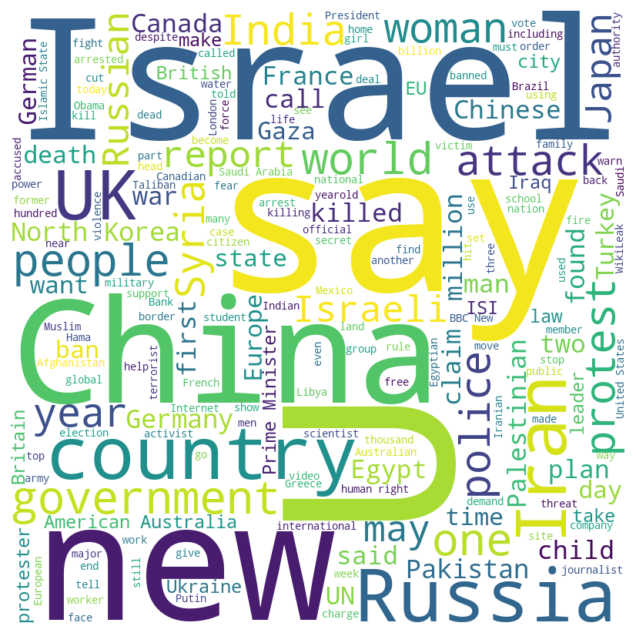

In [7]:
from wordcloud import WordCloud

combined_text = ' '.join(df_news['News_Preprocessed_advanced'].tolist())

# Create the word cloud object
wc = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
df_stock.sort_values(by='Date',inplace=True)

In [9]:
# Get 5 random samples with reproducibility
df_stock.sample(n=5
               , random_state=42
              )

Date          Open          High           Low         Close     Volume     Adj Close
815   2013-04-09  14613.480469  14716.459961  14598.500000  14673.459961  128580000  14673.459961
338   2015-03-02  18134.050781  18288.630859  18122.589844  18288.630859   89790000  18288.630859
1145  2011-12-12  12181.080078  12181.379883  11940.860352  12021.389648  149050000  12021.389648
1918  2008-11-17   8494.839844   8571.299805   8246.889648   8273.580078  278220000   8273.580078
1233  2011-08-08  11433.929688  11434.089844  10809.849609  10809.849609  479980000  10809.849609

In [10]:
# Convert prices to returns
df_stock.sort_values(by='Date',inplace=True)
df_stock['returns'] = df_stock['Adj Close'].pct_change()

# Drop the first row, which will have a missing return
df_stock = df_stock.dropna()

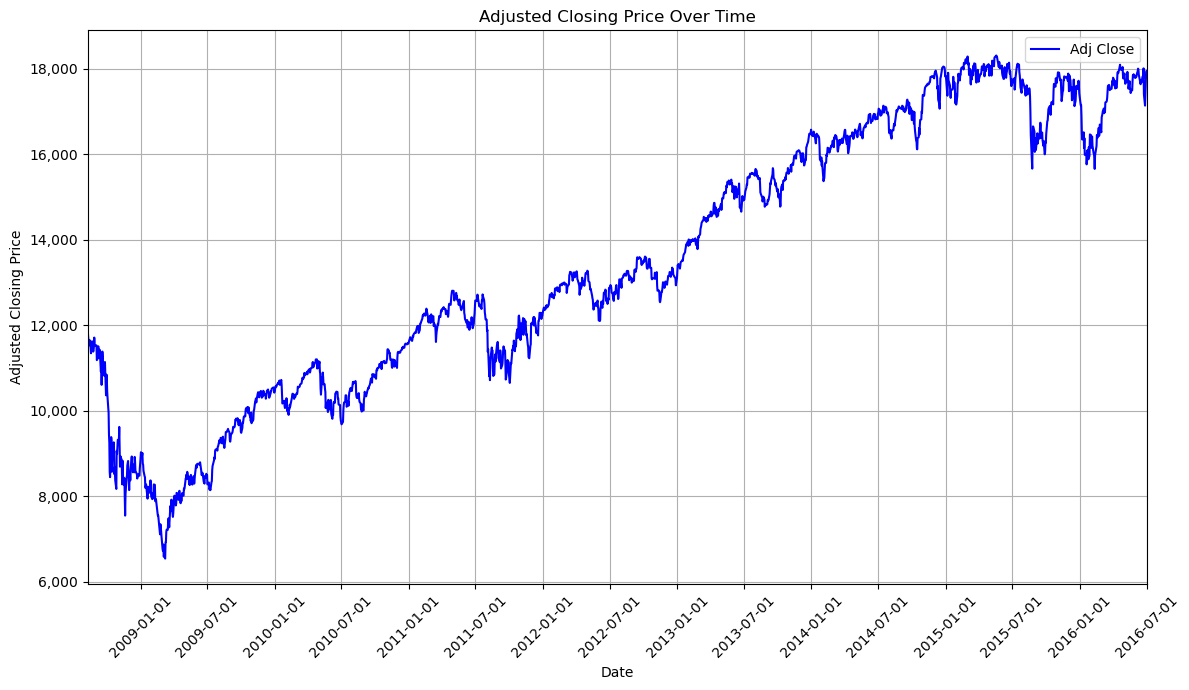

In [11]:
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter

# Custom function to format y-axis tick labels with thousands separator
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Ensuring 'Date' column is of type datetime64
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Setting the x-axis limits to match the date range of the data
start_date = pd.to_datetime(df_stock['Date'].min())
end_date = pd.to_datetime(df_stock['Date'].max())

# Plotting
plt.figure(figsize=(12, 7))
plt.plot(df_stock['Date'], df_stock['Adj Close'], color='b', label='Adj Close')
plt.title('Adjusted Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')

# Setting the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(bymonth=[1, 7], bymonthday=1))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Setting the formatter for the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Explicitly setting the x-axis limits
ax.set_xlim(start_date, end_date)

# Rotate the date labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

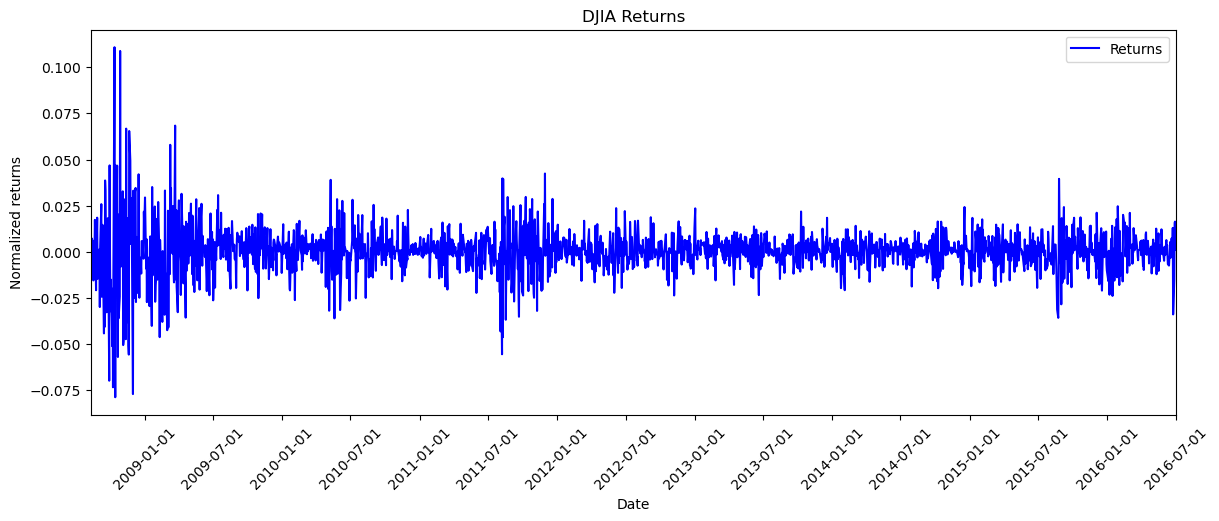

In [12]:
# Plot the actual and predicted returns
plt.figure(figsize=(14, 5))
plt.plot(df_stock['Date'],df_stock['returns'], color='blue', label='Returns')

# Setting the locator and formatter for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(bymonth=[1, 7], bymonthday=1))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Explicitly setting the x-axis limits
ax.set_xlim(start_date, end_date)

# Rotate the date labels for better visibility
plt.xticks(rotation=45)

plt.title('DJIA Returns')
plt.xlabel('Date')
plt.ylabel('Normalized returns')
plt.legend()
plt.show()


In [13]:
df_news.to_csv(os.path.join('..', 'data', 'RedditNews_preprocessed.csv'), index=False)
df_stock.to_csv(os.path.join('..', 'data', 'upload_DJIA_table_preprocessed.csv'), index=False)